# Customer_Churn_Analysis

Problem Statement:
    
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EDA:

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Columns:
    
1. customerID
2. gender
3. SeniorCitizen
4. Partner
5. Dependents
6. tenure
7. PhoneService
8. MultipleLines
9. InternetService
10. OnlineSecurity
11. OnlineBackup
12. DeviceProtection
13. TechSupport
14. StreamingTV
15. StreamingMovies
16. Contract
17. PaperlessBilling
18. PaymentMethod
19. MonthlyCharges
20. TotalCharges
21. Churn

In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no null values so we can proceed with further analysis

In [8]:
collist = df.columns.values

for i in collist:
    print(f"Unique value of {i} is {df[i].unique()}\n")

Unique value of customerID is ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique value of gender is ['Female' 'Male']

Unique value of SeniorCitizen is [0 1]

Unique value of Partner is ['Yes' 'No']

Unique value of Dependents is ['No' 'Yes']

Unique value of tenure is [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique value of PhoneService is ['No' 'Yes']

Unique value of MultipleLines is ['No phone service' 'No' 'Yes']

Unique value of InternetService is ['DSL' 'Fiber optic' 'No']

Unique value of OnlineSecurity is ['No' 'Yes' 'No internet service']

Unique value of OnlineBackup is ['Yes' 'No' 'No internet service']

Unique value of DeviceProtection is ['No' 'Yes' 'No internet service']

Unique value of TechSupport is ['No' 'Yes' 'No internet service']

Unique valu

In [9]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

we can remove customerID column as it does not contribute much to our analysis and has all unique values

In [10]:
df = df.drop(['customerID'],axis=1)

Will check for categorical columns

In [14]:
col = df.columns
num_col = df._get_numeric_data().columns

cat_col = list(set(col) - set(num_col))
cat_col

['OnlineSecurity',
 'PhoneService',
 'Dependents',
 'OnlineBackup',
 'Churn',
 'StreamingTV',
 'gender',
 'PaymentMethod',
 'TotalCharges',
 'PaperlessBilling',
 'TechSupport',
 'Contract',
 'MultipleLines',
 'InternetService',
 'StreamingMovies',
 'DeviceProtection',
 'Partner']

# converting categorical column to numeric using label encoder

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_col:
    df[i] = le.fit_transform(df[i])

In [16]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [17]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


Key Observations:

1. Here outliers is present in 'tenure', 'MonthlyCharges', 'TotalCharges' as there is large difference between 75% and max
2. Based on describe data skewness is Present in 'MonthlyCharges', 'TotalCharges'

In [19]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


<AxesSubplot:>

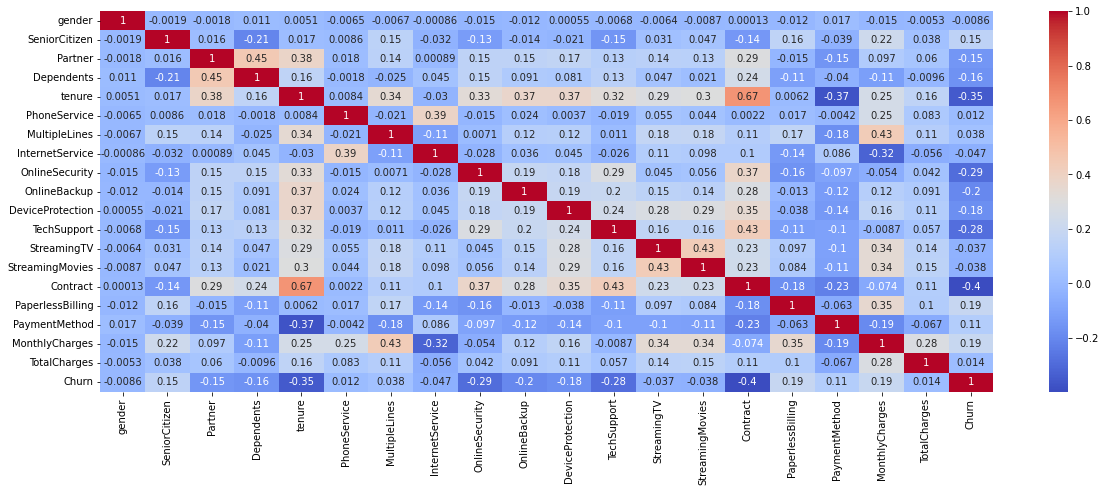

In [20]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Text(0.5, 1.0, 'correlation with target variable')

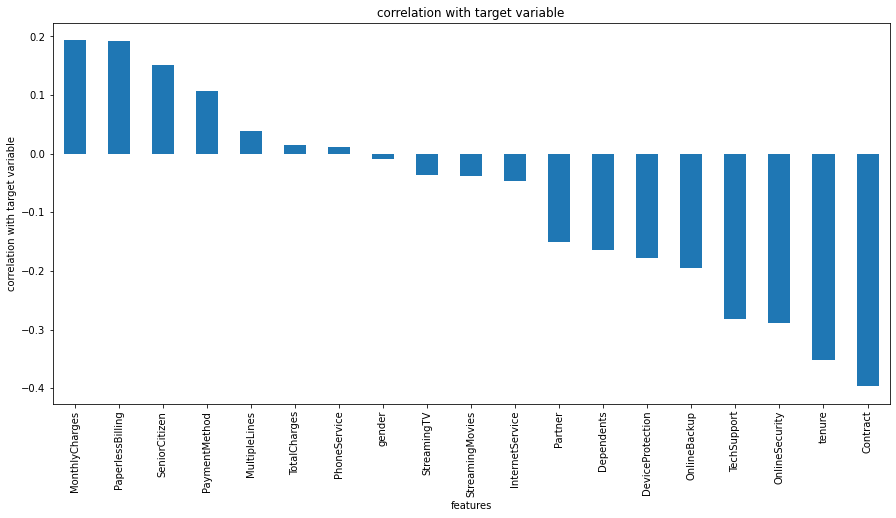

In [23]:
plt.figure(figsize=(15,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot.bar()
plt.xlabel("features")
plt.ylabel("correlation with target variable")
plt.title("correlation with target variable")

Key Observations:

1. 'MonthlyCharges', 'PaperlessBilling', 'SeniorCitizen', 'PaymentMethod', 'MultipleLines', 'TotalCharges', 'PhoneService' are positively correlated with target column.

2. 'Contract', 'tenure','OnlineSecurity', 'TechSupport','OnlineBackup', 'DeviceProtection', 'Dependents', 'Partner', 'InternetService','StreamingMovies' are negatively correlated with target column

# Skewness:

In [25]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

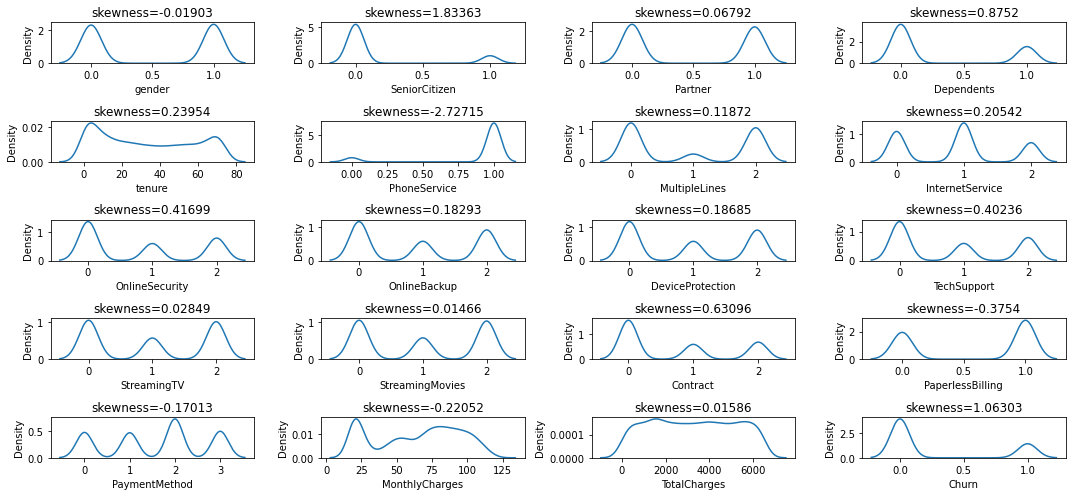

In [29]:
collist = df.columns.values
plt.figure(figsize=(15,7))

for i in range(0,len(collist)):
    plt.subplot(5,4,i+1)
    sns.kdeplot(df[collist[i]])
    plt.title(f"skewness={round(df[collist[i]].skew(),5)}")
    plt.tight_layout()

keeping +/-0.5 as skew value. Skewness is present in 'SeniorCitizen', 'Dependents', 'PhoneService', 'Contract' columns

# Removing skewness:

In [30]:
x = df.iloc[:,:-1]
y= df.iloc[:,-1]

In [35]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')

In [40]:
pd.DataFrame(x_new).skew().sort_values(ascending=True)

5    -2.727153
15   -0.375396
18   -0.290854
17   -0.259035
4    -0.243325
16   -0.207559
13   -0.105641
12   -0.097211
7    -0.072384
0    -0.019031
9    -0.001417
10    0.001051
6     0.033697
2     0.067922
11    0.139751
8     0.149362
14    0.302174
3     0.875199
1     1.833633
dtype: float64

In [42]:
x=pd.DataFrame((x_new),columns=x.columns)

# Detecting Outliers:

gender                 AxesSubplot(0.125,0.749828;0.168478x0.130172)
SeniorCitizen       AxesSubplot(0.327174,0.749828;0.168478x0.130172)
Partner             AxesSubplot(0.529348,0.749828;0.168478x0.130172)
Dependents          AxesSubplot(0.731522,0.749828;0.168478x0.130172)
tenure                 AxesSubplot(0.125,0.593621;0.168478x0.130172)
PhoneService        AxesSubplot(0.327174,0.593621;0.168478x0.130172)
MultipleLines       AxesSubplot(0.529348,0.593621;0.168478x0.130172)
InternetService     AxesSubplot(0.731522,0.593621;0.168478x0.130172)
OnlineSecurity         AxesSubplot(0.125,0.437414;0.168478x0.130172)
OnlineBackup        AxesSubplot(0.327174,0.437414;0.168478x0.130172)
DeviceProtection    AxesSubplot(0.529348,0.437414;0.168478x0.130172)
TechSupport         AxesSubplot(0.731522,0.437414;0.168478x0.130172)
StreamingTV            AxesSubplot(0.125,0.281207;0.168478x0.130172)
StreamingMovies     AxesSubplot(0.327174,0.281207;0.168478x0.130172)
Contract            AxesSubplot(0.

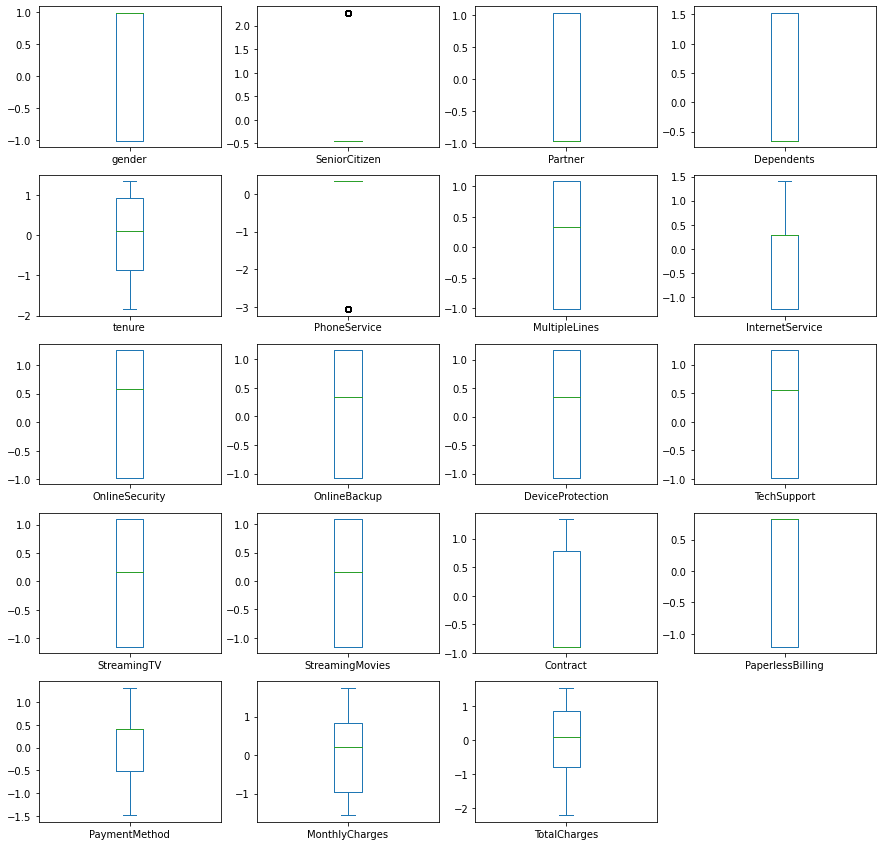

In [46]:
x.plot(kind='box',subplots='True',layout=(5,4),figsize=(15,15))

Outliers are present in 'PhoneService', 'SeniorCitizen'

# Removing outliers:

In [47]:
from scipy.stats import zscore
z = np.abs(zscore(x))
threshold = 3
x_new = x[(z<3).all(axis=1)]

In [48]:
print("Old DataFrame : ",x.shape)
print("New DataFrame : ",x_new.shape)
print("Rows Dropped : ",x.shape[0] - x_new.shape[0])

Old DataFrame :  (7043, 19)
New DataFrame :  (6361, 19)
Rows Dropped :  682


In [50]:
percentage_loss = (7043-6361)/7043*100
percentage_loss

9.683373562402386

There is large amount of data loss so we need to do further analysis by keeping outliers

# Data Visualization:

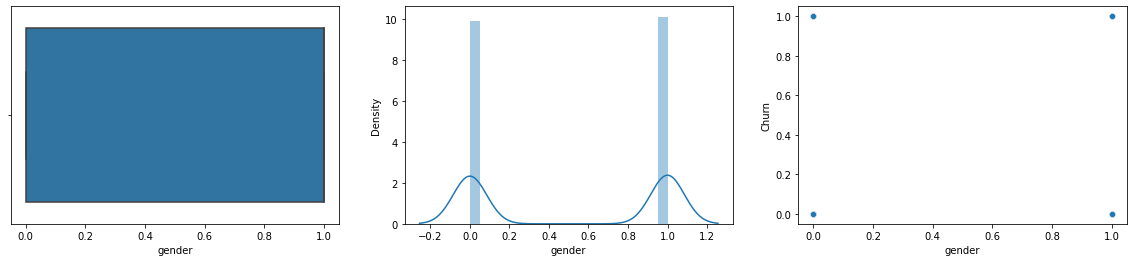

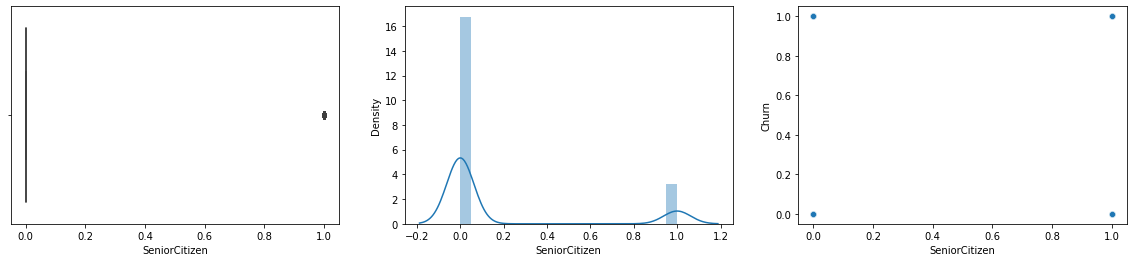

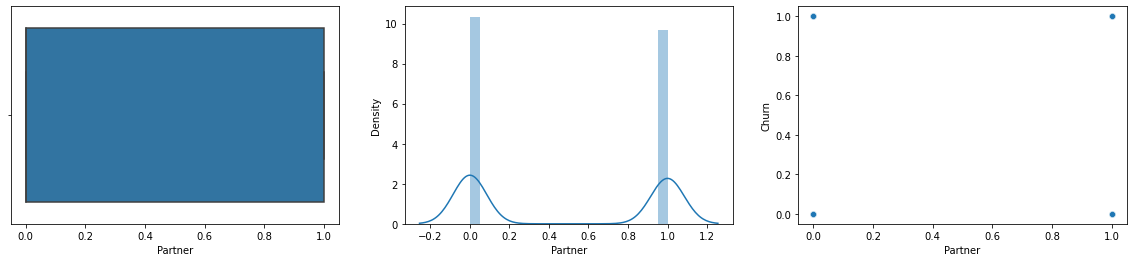

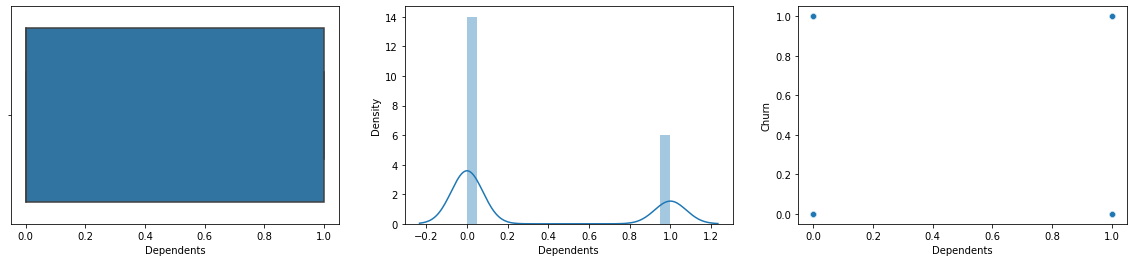

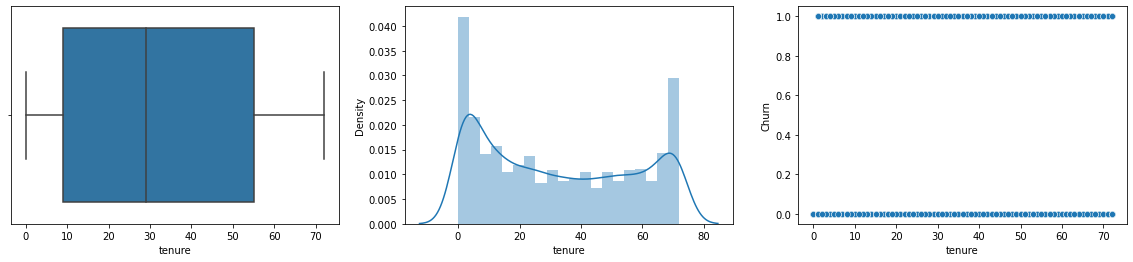

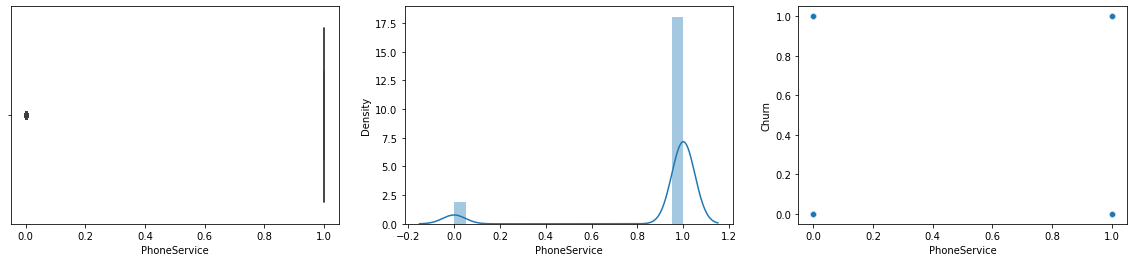

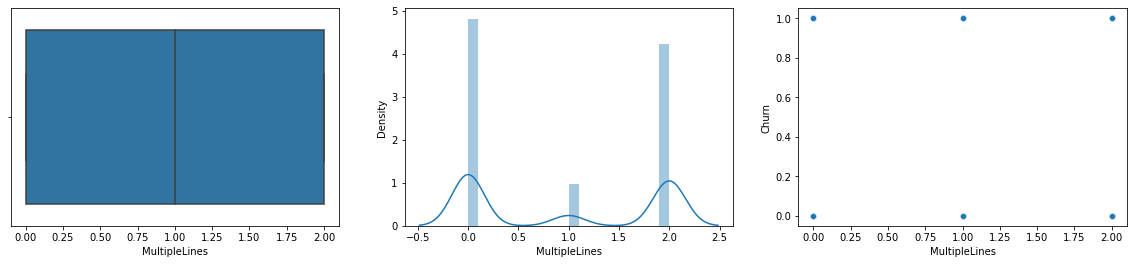

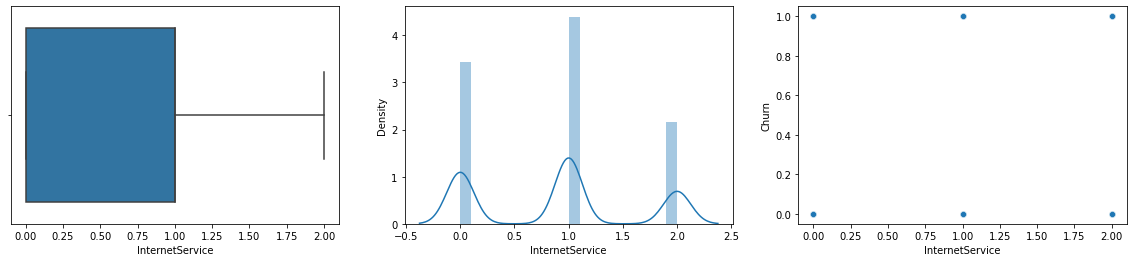

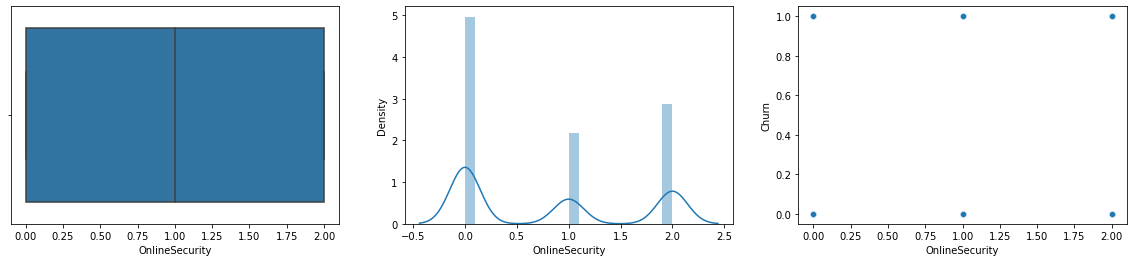

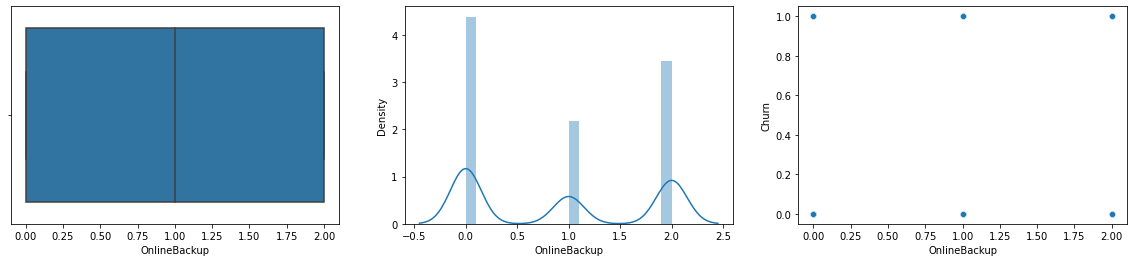

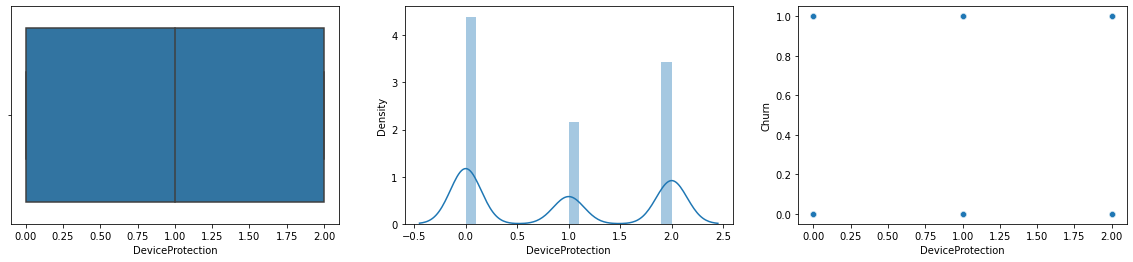

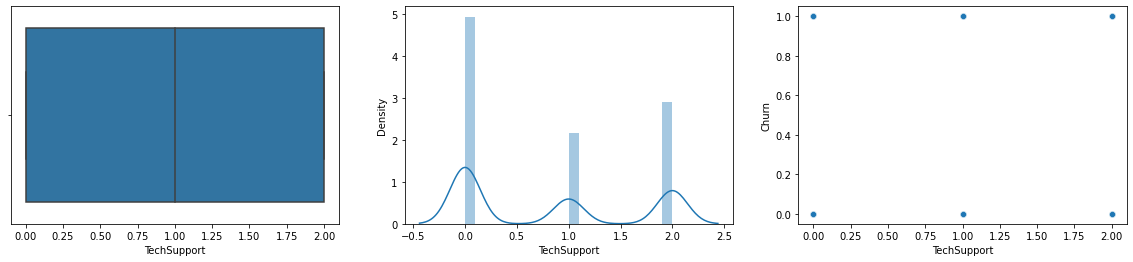

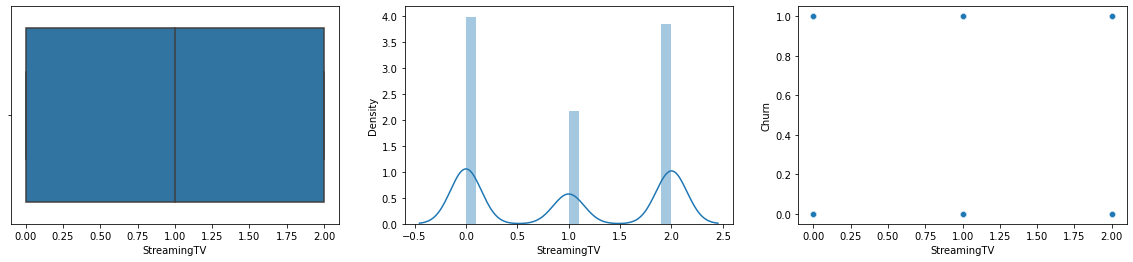

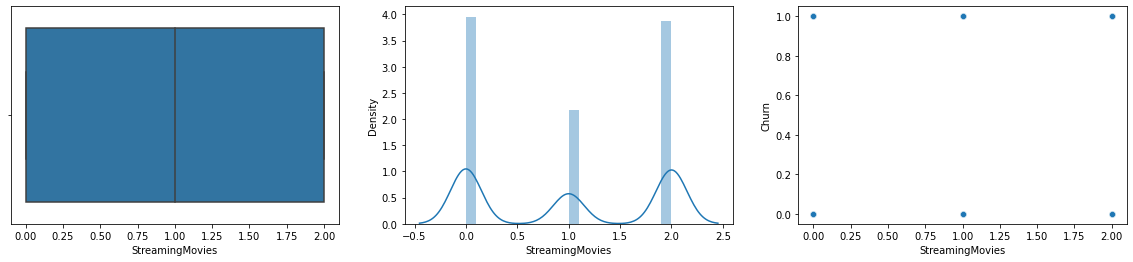

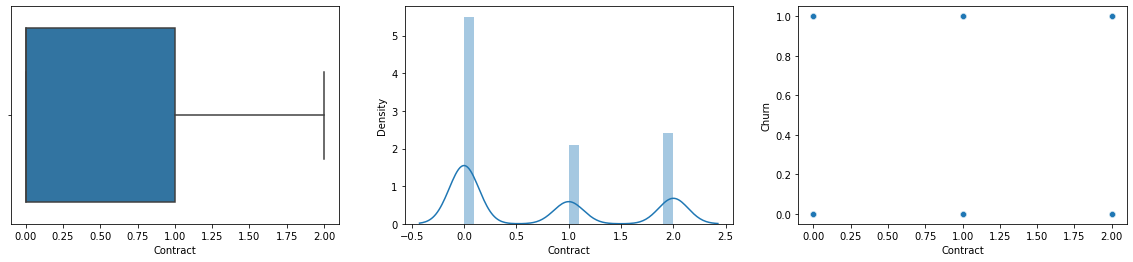

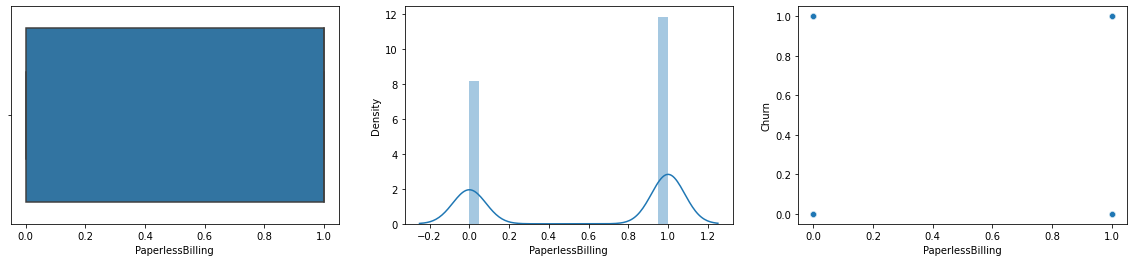

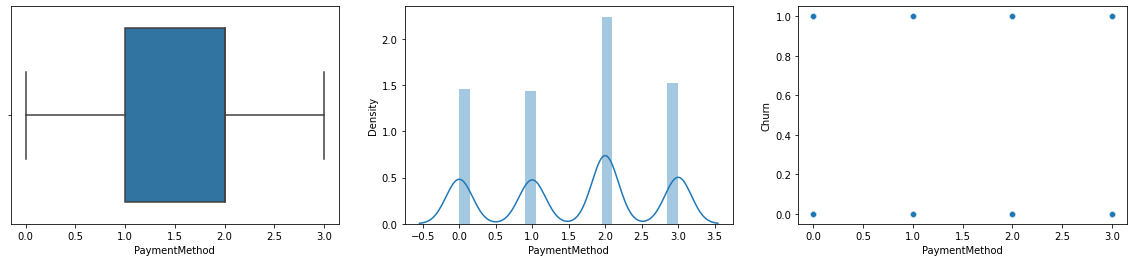

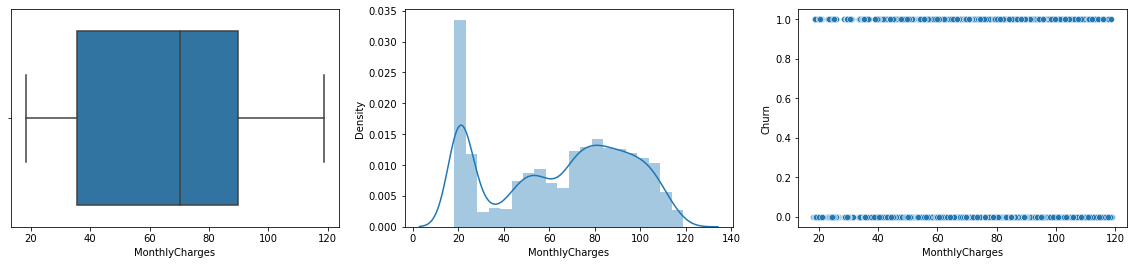

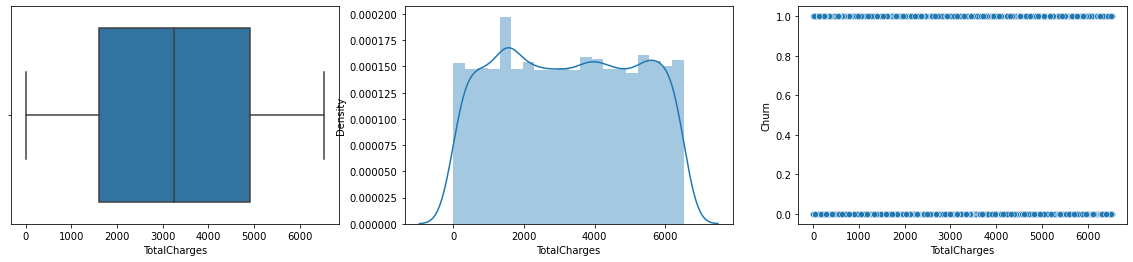

In [87]:
target_variable = 'Churn'
feature_variable = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']

def num_plots(feature_name):
    fig,axs = plt.subplots(1,3,figsize=(20,4))
    a1 = sns.boxplot(x=df[feature_name],ax=axs[0])
    a2 = sns.distplot(df[feature_name],bins=20,kde=True,ax=axs[1])
    a3 = sns.scatterplot(data=df,x=feature_name,y=target_variable,ax=axs[2])
    plt.show()
    
for i in feature_variable:
    num_plots(i)

the above visalization shows the relationship between target and feature variable

# Scaling data

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

# Multicolinearity

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,VIF,Features
0,1.001487,gender
1,1.150092,SeniorCitizen
2,1.458428,Partner
3,1.380329,Dependents
4,2.565713,tenure
5,1.618140,PhoneService
6,1.398540,MultipleLines
7,1.702865,InternetService
8,1.329794,OnlineSecurity
9,1.200306,OnlineBackup


As vif value is less than 5 we no need to remove any columns

# Balancing target variable

In [55]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [58]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [59]:
x_scaled,y = sm.fit_resample(x_scaled,y)


In [60]:
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

# Training the Dataset

In [61]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LogisticRegression

In [62]:
acc = 0

for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,random_state=i,test_size=.22)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred_y = lr.predict(x_test)
    temp = accuracy_score(y_test,pred_y)
    if temp > acc:
        acc = temp
        best_rstate = i
print("Accuracy Score : ",acc*100,"Random State : ",best_rstate)    
    

Accuracy Score :  80.14931927975407 Random State :  409


In [63]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,random_state=409,test_size=.22)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [65]:
lr = LogisticRegression()
kn = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()
gnb = GaussianNB()
rfc = RandomForestClassifier()
ada = AdaBoostClassifier()

model = [lr,kn,dtc,svc,gnb,rfc,ada]

In [68]:
mean_squared_err = []
mean_absolute_err = []
r2 = []

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    
    print("Accuracy Score of ",m," is ", accuracy_score(y_test,predm))
    print("Mean Squared Error is ",mean_squared_error(y_test,predm))
    mean_squared_err.append(mean_squared_error(y_test,predm))
    print("Mean absolute error is ",mean_absolute_error(y_test,predm))
    mean_absolute_err.append(mean_absolute_error(y_test,predm))
    print("r2 score is ",r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))
    
    print("Confusion Matrix is ",confusion_matrix(y_test,predm))
    print("Classification Report is ",classification_report(y_test,predm))
    print("\n\n")

Accuracy Score of  LogisticRegression()  is  0.8014931927975406
Mean Squared Error is  0.1985068072024594
Mean absolute error is  0.1985068072024594
r2 score is  0.20557423514046747
Confusion Matrix is  [[880 233]
 [219 945]]
Classification Report is                precision    recall  f1-score   support

           0       0.80      0.79      0.80      1113
           1       0.80      0.81      0.81      1164

    accuracy                           0.80      2277
   macro avg       0.80      0.80      0.80      2277
weighted avg       0.80      0.80      0.80      2277




Accuracy Score of  KNeighborsClassifier()  is  0.8102766798418972
Mean Squared Error is  0.18972332015810275
Mean absolute error is  0.18972332015810275
r2 score is  0.2407258176563759
Confusion Matrix is  [[ 788  325]
 [ 107 1057]]
Classification Report is                precision    recall  f1-score   support

           0       0.88      0.71      0.78      1113
           1       0.76      0.91      0.83      1

We have RandomForestClassifier with 86%

# Cross Validation:

In [69]:
std = []
mean = []

for m in model:
    CV = cross_val_score(m,x_scaled,y,cv=5)
    print("Score of ",m," is ",CV)
    print("Mean Score is ",CV.mean())
    mean.append(CV.mean())
    print("Standard Deviation is ",CV.std())
    std.append(CV.std())
    print('\n')

Score of  LogisticRegression()  is  [0.76956522 0.7647343  0.76811594 0.78105365 0.78927018]
Mean Score is  0.7745478573746798
Standard Deviation is  0.009182311573230894


Score of  KNeighborsClassifier()  is  [0.77149758 0.78405797 0.80096618 0.80280329 0.81391977]
Mean Score is  0.7946489587492381
Standard Deviation is  0.01500612961853977


Score of  DecisionTreeClassifier()  is  [0.70869565 0.72560386 0.83478261 0.83566941 0.82841953]
Mean Score is  0.7866342114910001
Standard Deviation is  0.05704007923670471


Score of  SVC()  is  [0.77536232 0.78405797 0.82512077 0.82890285 0.84098598]
Mean Score is  0.8108859795976026
Standard Deviation is  0.026133961721124994


Score of  GaussianNB()  is  [0.76231884 0.74975845 0.75748792 0.77187047 0.77090382]
Mean Score is  0.762467900897304
Standard Deviation is  0.008317757210490896


Score of  RandomForestClassifier()  is  [0.77391304 0.79565217 0.89661836 0.89850169 0.90865152]
Mean Score is  0.854667357798465
Standard Deviation is  0.

we have RandomForestClassifier with 85% accuracy which is almost similar to score with cross validation.

Lets hypertune to improve accuracy

# HyperTuning

In [70]:
from sklearn.model_selection import GridSearchCV

In [72]:
param_grid = [{'n_estimators':[10,20,30,50],
              'criterion':['gini','entropy'],
              'max_features':['auto','sqrt','log2']}]

rf = RandomForestClassifier(random_state=42,n_jobs=-1)

In [73]:
rf_random = GridSearchCV(rf,param_grid,cv=5)

In [74]:
rf_random.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [10, 20, 30, 50]}])

In [75]:
rf_random.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 50}

In [76]:
rf_random.best_score_

0.8468589470615091

After Hypertuning we have 84.5% accuracy which is almost similar

In [77]:
preds = cross_val_predict(rf_random.best_estimator_,x_train,y_train,cv=5,n_jobs=-1)

In [78]:
predy = rfc.predict(x_test)
predy

array([0, 1, 1, ..., 0, 0, 1])

# AUC-ROC Curve

In [79]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [80]:
y_pred_proba = rfc.predict_proba(x_test)[:,-1]

In [81]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)

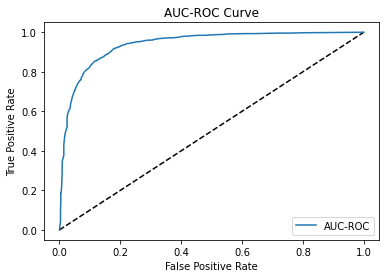

In [82]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AUC-ROC')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve")
plt.legend(loc='lower right')
plt.show()

In [83]:
auc_score = roc_auc_score(y_test,rfc.predict(x_test))
print(auc_score)

0.8673027760024453


# Saving best model

In [84]:
import joblib
joblib.dump(predy,'Customer_Churn_Analysis.obj')

['Customer_Churn_Analysis.obj']